NAIVES BAYES. ALGORITMO USADO PARA PROCESSAR A CORPORA DO PROJETO INTITULADO: EVIDENCIAS DO USO DE ALGORITMOS DE PROCESSAMENTO DE LINGUAGEM NATURAL E MACHINE LEARNING APLICADOS COMO FERRAMENTA DIAGOSTICA à TRANSVERSALIDADE EM PERNAMBUCO

## **CLASSE TIPO 1 BALANCEADA NAIVE BAYES**

[ETAPA 1] Lendo o corpus...
[INFO] Uso atual de memória RAM: 181.06 MB
[INFO] Colunas do corpus: ['texto_limpo', 'label_final', 'espectro_tipo2', 'espectro_tipo3', 'documento', 'zero_duplo', 'zero_triplo']
[ETAPA 2] Removendo entradas com dados faltantes...
[INFO] Uso atual de memória RAM: 180.18 MB
[INFO] Total de amostras após limpeza: 78768
[ETAPA 3] Vetorizando os textos com CountVectorizer...
[INFO] Uso atual de memória RAM: 270.14 MB
[INFO] Esparsidade da matriz: 0.9990 (valores próximos de 1 indicam muitos zeros)
[ETAPA 4] Separando dados de treino e teste...
[INFO] Uso atual de memória RAM: 278.15 MB
[ETAPA 5] Treinando o classificador Multinomial Naive Bayes...
[ETAPA 6] Avaliando o modelo...

[RESULTADO] Relatório de Classificação:
              precision    recall  f1-score   support

    Positive       0.84      0.87      0.85      6564
     Neutral       0.70      0.66      0.68      6564
    Negative       0.81      0.84      0.82      6564

    accuracy                  

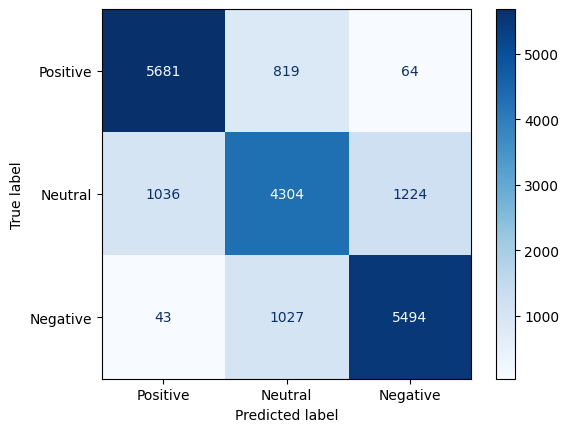

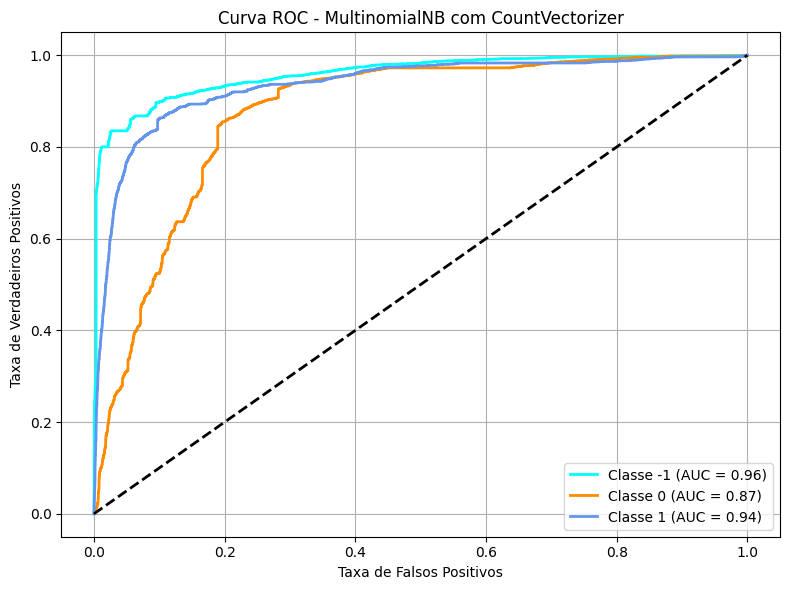

In [1]:
import pandas as pd
import numpy as np
import psutil
import os
import time

# --- Função auxiliar para mostrar uso de memória ---
def mostrar_uso_memoria():
    processo = psutil.Process(os.getpid())
    mem = processo.memory_info().rss / (1024 ** 2)  # em MB
    print(f"[INFO] Uso atual de memória RAM: {mem:.2f} MB")

print("[ETAPA 1] Lendo o corpus...")
df_corpus = pd.read_csv("/content/corpus_balanceado_tp1.csv")
mostrar_uso_memoria()

# Verifica colunas
print("[INFO] Colunas do corpus:", df_corpus.columns.tolist())

print("[ETAPA 2] Removendo entradas com dados faltantes...")
df_corpus = df_corpus.dropna(subset=["texto_limpo", "label_final"])
mostrar_uso_memoria()

# Separação de variáveis
textos = df_corpus["texto_limpo"].values
labels = df_corpus["label_final"].values
print(f"[INFO] Total de amostras após limpeza: {len(textos)}")

# Vetorização com CountVectorizer
print("[ETAPA 3] Vetorizando os textos com CountVectorizer...")
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos)
mostrar_uso_memoria()

# Cálculo da esparsidade
total_elementos = X.shape[0] * X.shape[1]
elementos_nao_zero = X.nnz
esparcidade = 1.0 - (elementos_nao_zero / total_elementos)
print(f"[INFO] Esparsidade da matriz: {esparcidade:.4f} (valores próximos de 1 indicam muitos zeros)")

# Divisão treino/teste
from sklearn.model_selection import train_test_split
print("[ETAPA 4] Separando dados de treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42, stratify=labels)
mostrar_uso_memoria()

# Treinamento do modelo
from sklearn.naive_bayes import MultinomialNB
print("[ETAPA 5] Treinando o classificador Multinomial Naive Bayes...")
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)

# Avaliação
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("[ETAPA 6] Avaliando o modelo...")
y_pred = modelo_nb.predict(X_test)
print("\n[RESULTADO] Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=["Positive", "Neutral", "Negative"]))

# Matriz de Confusão
print("[ETAPA 7] Gerando matriz de confusão...")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap="Blues")
mostrar_uso_memoria()

# Curvas ROC
print("[ETAPA 8] Calculando curva ROC...")
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Binariza as classes
classes_unicas = np.unique(labels)
y_test_bin = label_binarize(y_test, classes=classes_unicas)
y_prob = modelo_nb.predict_proba(X_test)

plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(len(classes_unicas)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Classe {classes_unicas[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Curva ROC - MultinomialNB com CountVectorizer')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

[INFO] Melhor alpha para NB: {'nb__alpha': 0.001}
[INFO] Melhor f1_macro (CV): 0.8409742941519195

🔍 Avaliando modelo: MultinomialNB
              precision    recall  f1-score   support

          -1       0.86      0.90      0.88      5251
           0       0.77      0.72      0.75      5251
           1       0.87      0.88      0.87      5252

    accuracy                           0.83     15754
   macro avg       0.83      0.83      0.83     15754
weighted avg       0.83      0.83      0.83     15754



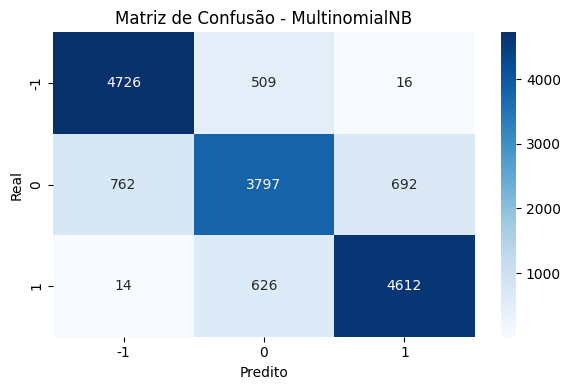

[INFO] F1 Macro médio (CV): 0.8292

🔍 Avaliando modelo: LinearSVC


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      5251
           0       0.96      0.96      0.96      5251
           1       0.98      0.98      0.98      5252

    accuracy                           0.98     15754
   macro avg       0.98      0.98      0.98     15754
weighted avg       0.98      0.98      0.98     15754



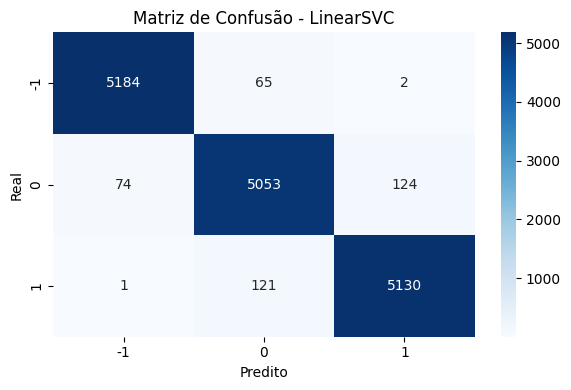

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[INFO] F1 Macro médio (CV): 0.9724

🔍 Avaliando modelo: LogisticRegression
              precision    recall  f1-score   support

          -1       0.98      0.99      0.99      5251
           0       0.96      0.96      0.96      5251
           1       0.98      0.98      0.98      5252

    accuracy                           0.98     15754
   macro avg       0.98      0.98      0.98     15754
weighted avg       0.98      0.98      0.98     15754



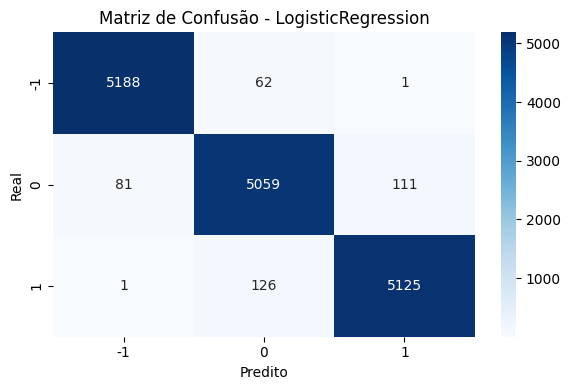

[INFO] F1 Macro médio (CV): 0.9750


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 🔹 Carregamento dos dados
df = pd.read_csv("/content/corpus_balanceado_tp1.csv").dropna()
textos = df["texto_limpo"] # Changed 'texto' to 'paragrafo'
rotulos = df["label_final"]

# 2. 🔹 Separação treino-teste
X_train, X_test, y_train, y_test = train_test_split(textos, rotulos, test_size=0.2, stratify=rotulos, random_state=42)


grid_nb = GridSearchCV(pipe_nb, param_grid_nb, cv=5, scoring='f1_macro')
grid_nb.fit(X_train, y_train)

print("[INFO] Melhor alpha para NB:", grid_nb.best_params_)
print("[INFO] Melhor f1_macro (CV):", grid_nb.best_score_)

# 6. 🔹 Avaliação final dos 3 modelos
for nome, modelo in modelos.items():
    print(f"\n🔍 Avaliando modelo: {nome}")
    pipe = Pipeline([
        ('vect', vectorizer),
        ('clf', modelo)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipe.classes_, yticklabels=pipe.classes_)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

    # Validação cruzada
    scores = cross_val_score(pipe, textos, rotulos, cv=5, scoring='f1_macro')
    print(f"[INFO] F1 Macro médio (CV): {scores.mean():.4f}")

## **CLASSE TIPO 2 BALANCEADA PELO NAIVE BAYES**

In [3]:
import pandas as pd
import numpy as np
import psutil
import os

# ===============================
# FUNÇÃO AUXILIAR: USO DE MEMÓRIA
# ===============================
def mostrar_uso_memoria():
    processo = psutil.Process(os.getpid())
    mem = processo.memory_info().rss / (1024 ** 2)
    print(f"[INFO] Uso atual de memória RAM: {mem:.2f} MB")


# ===============================
# ETAPA 1 — LEITURA DO CORPUS
# ===============================
print("[ETAPA 1] Lendo o corpus...")
df_corpus = pd.read_csv("/content/corpus_balanceado_tp2.csv")
mostrar_uso_memoria()

print("[INFO] Colunas disponíveis:", df_corpus.columns.tolist())


# ===============================
# ETAPA 2 — LIMPEZA
# ===============================
print("[ETAPA 2] Removendo dados faltantes...")
df_corpus = df_corpus.dropna(subset=["texto_limpo", "espectro_tipo2"])
mostrar_uso_memoria()


# ===============================
# ETAPA 3 — EXTRAÇÃO DE VARIÁVEIS
# ===============================
textos = df_corpus["texto_limpo"].values
labels = df_corpus["espectro_tipo2"].values

print(f"[INFO] Total de amostras após limpeza: {len(textos)}")


# ===============================
# ETAPA 4 — DEFINIÇÃO EXPLÍCITA DAS CLASSES
# (CRUCIAL PARA MULTICLASSE ASSIMÉTRICA)
# ===============================
labels_ordem = [-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]
nomes_classes = [str(l) for l in labels_ordem]


# ===============================
# ETAPA 5 — VETORIZAÇÃO
# ===============================
from sklearn.feature_extraction.text import CountVectorizer

print("[ETAPA 5] Vetorizando textos (CountVectorizer)...")
vectorizer = CountVectorizer(
    min_df=2,        # reduz ruído
    max_df=0.95      # evita termos dominantes
)

X = vectorizer.fit_transform(textos)
mostrar_uso_memoria()

# Diagnóstico de esparsidade
total = X.shape[0] * X.shape[1]
esparcidade = 1 - (X.nnz / total)
print(f"[INFO] Esparsidade da matriz: {esparcidade:.4f}")


# ===============================
# ETAPA 6 — TREINO / TESTE
# ===============================
from sklearn.model_selection import train_test_split

print("[ETAPA 6] Separando treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(
    X,
    labels,
    test_size=0.25,
    random_state=42,
    stratify=labels
)
mostrar_uso_memoria()


# ===============================
# ETAPA 7 — TREINAMENTO
# ===============================
from sklearn.naive_bayes import MultinomialNB

print("[ETAPA 7] Treinando Multinomial Naive Bayes...")
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)


# ===============================
# ETAPA 8 — AVALIAÇÃO
# ===============================
from sklearn.metrics import classification_report

print("\n[RESULTADO] Relatório de Classificação:")

print(classification_report(
    y_test,
    modelo_nb.predict(X_test),
    labels=labels_ordem,
    target_names=nomes_classes,
    zero_division=0
))


[ETAPA 1] Lendo o corpus...
[INFO] Uso atual de memória RAM: 363.60 MB
[INFO] Colunas disponíveis: ['texto_limpo', 'label_final', 'espectro_tipo2', 'espectro_tipo3', 'documento', 'zero_duplo', 'zero_triplo']
[ETAPA 2] Removendo dados faltantes...
[INFO] Uso atual de memória RAM: 363.60 MB
[INFO] Total de amostras após limpeza: 29260
[ETAPA 5] Vetorizando textos (CountVectorizer)...
[INFO] Uso atual de memória RAM: 363.60 MB
[INFO] Esparsidade da matriz: 0.9983
[ETAPA 6] Separando treino e teste...
[INFO] Uso atual de memória RAM: 363.60 MB
[ETAPA 7] Treinando Multinomial Naive Bayes...

[RESULTADO] Relatório de Classificação:
              precision    recall  f1-score   support

          -5       0.38      0.22      0.28       731
          -4       0.22      0.38      0.28       731
          -3       0.54      0.53      0.53       732
          -2       0.18      0.04      0.07       732
           0       0.16      0.15      0.15       732
           2       0.32      0.17      0.

[ETAPA 9] Matriz de confusão...


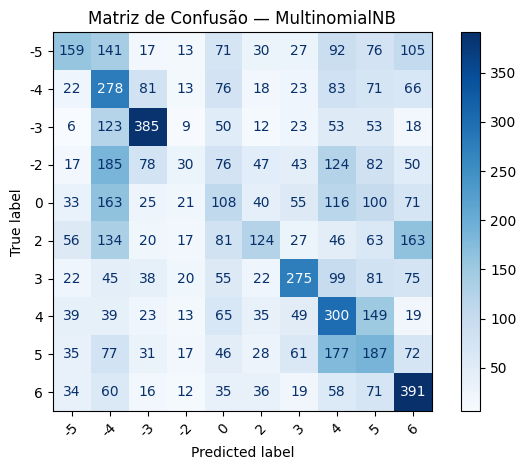

[INFO] Uso atual de memória RAM: 363.61 MB


In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("[ETAPA 9] Matriz de confusão...")

cm = confusion_matrix(
    y_test,
    modelo_nb.predict(X_test),
    labels=labels_ordem
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nomes_classes
)

disp.plot(
    cmap="Blues",
    xticks_rotation=45
)

plt.title("Matriz de Confusão — MultinomialNB")
plt.tight_layout()
plt.show()

mostrar_uso_memoria()


[ETAPA 10] Curvas ROC Multiclasse...


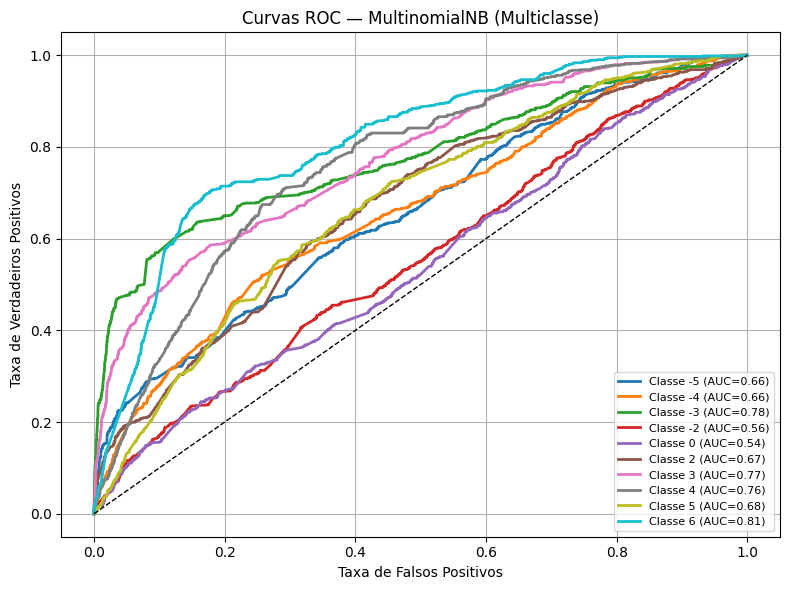

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

print("[ETAPA 10] Curvas ROC Multiclasse...")

# Binarização explícita
y_test_bin = label_binarize(y_test, classes=labels_ordem)
y_prob = modelo_nb.predict_proba(X_test)

plt.figure(figsize=(8, 6))
colors = cycle(plt.cm.tab10.colors)

for i, color in zip(range(len(labels_ordem)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        lw=2,
        color=color,
        label=f"Classe {labels_ordem[i]} (AUC={roc_auc:.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curvas ROC — MultinomialNB (Multiclasse)")
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


## **CLASSE TIPO 3 BALANCEADA**

In [6]:
import pandas as pd
import numpy as np
import psutil
import os

# ===============================
# FUNÇÃO AUXILIAR: USO DE MEMÓRIA
# ===============================
def mostrar_uso_memoria():
    processo = psutil.Process(os.getpid())
    mem = processo.memory_info().rss / (1024 ** 2)
    print(f"[INFO] Uso atual de memória RAM: {mem:.2f} MB")


# ===============================
# ETAPA 1 — LEITURA DO CORPUS
# ===============================
print("[ETAPA 1] Lendo o corpus...")
df_corpus = pd.read_csv("/content/corpus_balanceado_tp3.csv")
mostrar_uso_memoria()

print("[INFO] Colunas disponíveis:", df_corpus.columns.tolist())


# ===============================
# ETAPA 2 — LIMPEZA
# ===============================
print("[ETAPA 2] Removendo dados faltantes...")
df_corpus = df_corpus.dropna(subset=["texto_limpo", "espectro_tipo3"])
mostrar_uso_memoria()


# ===============================
# ETAPA 3 — EXTRAÇÃO DE VARIÁVEIS
# ===============================
textos = df_corpus["texto_limpo"].values
labels = df_corpus["espectro_tipo3"].values

print(f"[INFO] Total de amostras após limpeza: {len(textos)}")


# ===============================
# ETAPA 4 — DEFINIÇÃO EXPLÍCITA DAS CLASSES
# (CRUCIAL PARA MULTICLASSE ASSIMÉTRICA)
# ===============================
labels_ordem = [-6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6]
nomes_classes = [str(l) for l in labels_ordem]


# ===============================
# ETAPA 5 — VETORIZAÇÃO
# ===============================
from sklearn.feature_extraction.text import CountVectorizer

print("[ETAPA 5] Vetorizando textos (CountVectorizer)...")
vectorizer = CountVectorizer(
    min_df=2,        # reduz ruído
    max_df=0.95      # evita termos dominantes
)

X = vectorizer.fit_transform(textos)
mostrar_uso_memoria()

# Diagnóstico de esparsidade
total = X.shape[0] * X.shape[1]
esparcidade = 1 - (X.nnz / total)
print(f"[INFO] Esparsidade da matriz: {esparcidade:.4f}")


# ===============================
# ETAPA 6 — TREINO / TESTE
# ===============================
from sklearn.model_selection import train_test_split

print("[ETAPA 6] Separando treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(
    X,
    labels,
    test_size=0.25,
    random_state=42,
    stratify=labels
)
mostrar_uso_memoria()


# ===============================
# ETAPA 7 — TREINAMENTO
# ===============================
from sklearn.naive_bayes import MultinomialNB

print("[ETAPA 7] Treinando Multinomial Naive Bayes...")
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)


# ===============================
# ETAPA 8 — AVALIAÇÃO
# ===============================
from sklearn.metrics import classification_report

print("\n[RESULTADO] Relatório de Classificação:")

print(classification_report(
    y_test,
    modelo_nb.predict(X_test),
    labels=labels_ordem,
    target_names=nomes_classes,
    zero_division=0
))


[ETAPA 1] Lendo o corpus...
[INFO] Uso atual de memória RAM: 363.62 MB
[INFO] Colunas disponíveis: ['texto_limpo', 'label_final', 'espectro_tipo2', 'espectro_tipo3', 'documento', 'zero_duplo', 'zero_triplo']
[ETAPA 2] Removendo dados faltantes...
[INFO] Uso atual de memória RAM: 363.62 MB
[INFO] Total de amostras após limpeza: 2816
[ETAPA 5] Vetorizando textos (CountVectorizer)...
[INFO] Uso atual de memória RAM: 363.62 MB
[INFO] Esparsidade da matriz: 0.9950
[ETAPA 6] Separando treino e teste...
[INFO] Uso atual de memória RAM: 363.68 MB
[ETAPA 7] Treinando Multinomial Naive Bayes...

[RESULTADO] Relatório de Classificação:
              precision    recall  f1-score   support

          -6       0.31      0.72      0.43        64
          -5       0.11      0.06      0.08        64
          -4       0.12      0.19      0.14        64
          -3       0.24      0.33      0.28        64
          -2       0.28      0.12      0.17        64
           0       0.17      0.19      0.1

[ETAPA 9] Matriz de confusão...


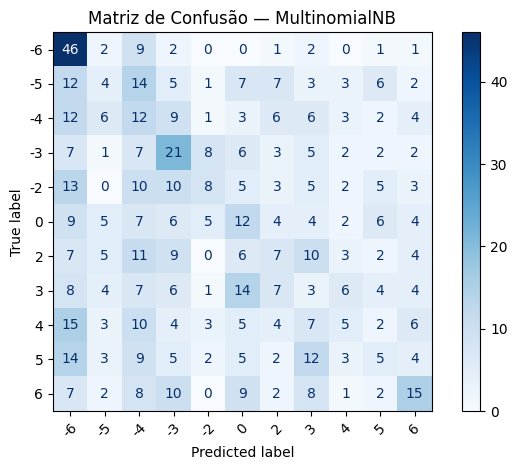

[INFO] Uso atual de memória RAM: 363.69 MB


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("[ETAPA 9] Matriz de confusão...")

cm = confusion_matrix(
    y_test,
    modelo_nb.predict(X_test),
    labels=labels_ordem
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nomes_classes
)

disp.plot(
    cmap="Blues",
    xticks_rotation=45
)

plt.title("Matriz de Confusão — MultinomialNB")
plt.tight_layout()
plt.show()

mostrar_uso_memoria()

[ETAPA 10] Curvas ROC Multiclasse...


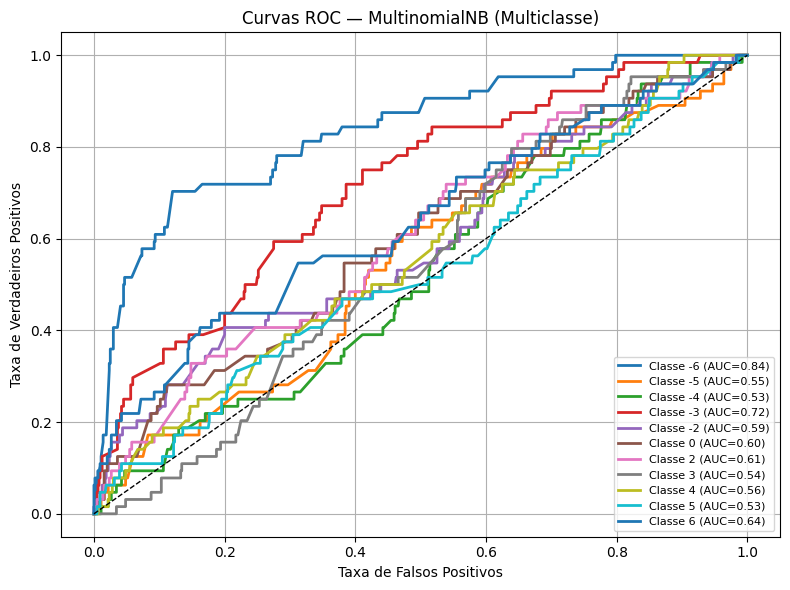

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

print("[ETAPA 10] Curvas ROC Multiclasse...")

# Binarização explícita
y_test_bin = label_binarize(y_test, classes=labels_ordem)
y_prob = modelo_nb.predict_proba(X_test)

plt.figure(figsize=(8, 6))
colors = cycle(plt.cm.tab10.colors)

for i, color in zip(range(len(labels_ordem)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        lw=2,
        color=color,
        label=f"Classe {labels_ordem[i]} (AUC={roc_auc:.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curvas ROC — MultinomialNB (Multiclasse)")
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
